In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
import missingno as msno

In [4]:
netflix = pd.read_csv('netflix_titles.csv')

In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

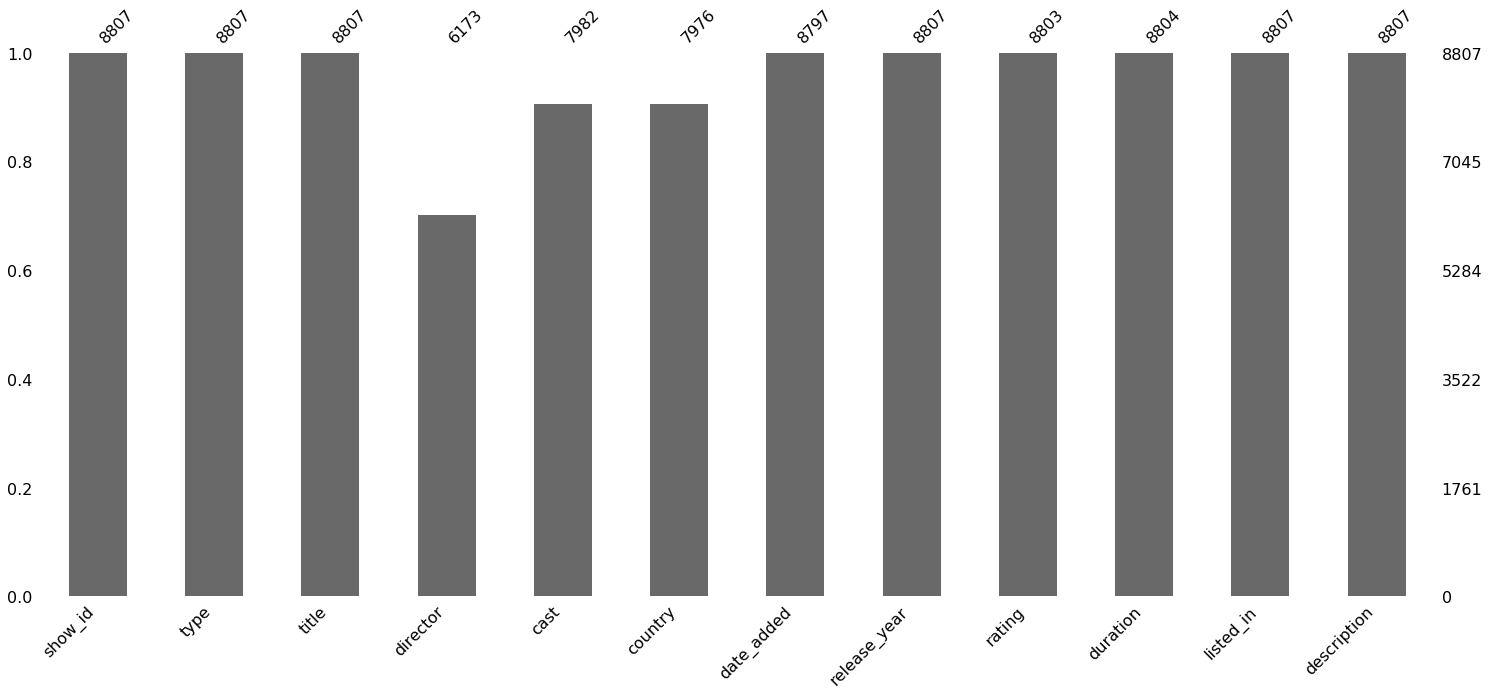

In [7]:
# 결측치 시각화
msno.bar(netflix)

In [8]:
netflix['country'] = netflix['country'].fillna("UnKnown")
netflix['country'].isna().sum()

0

In [9]:
# 나머지 칼럼의 결측치는 비중이 매우 적어 삭제

netflix = netflix.dropna().reset_index( drop = True)
netflix.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
netflix['country'].unique()

array(['UnKnown',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'United States', 'Germany, Czech Republic',
       'India', 'United States, India, France',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Japan', 'Nigeria',
       'Spain, United States', 'United Kingdom, United States',
       'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kingdom, Canada', 'China, Hong Kong',
       'Canada', 'Hong Kong', 'United States, China, Hong Kong',
       'Italy, United States', 'United States, Germany', 'France',
       'United Kingdom, Canada, 

In [33]:
netflix['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [34]:
# type 컬럼 category로 변경
netflix['type'] = pd.Categorical(netflix['type'])

netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   object  
 1   type          8807 non-null   category
 2   title         8807 non-null   object  
 3   director      6173 non-null   object  
 4   cast          7982 non-null   object  
 5   country       7976 non-null   object  
 6   date_added    8797 non-null   object  
 7   release_year  8807 non-null   int64   
 8   rating        8803 non-null   object  
 9   duration      8804 non-null   object  
 10  listed_in     8807 non-null   object  
 11  description   8807 non-null   object  
dtypes: category(1), int64(1), object(10)
memory usage: 765.7+ KB


In [36]:
# 나머지 칼럼의 결측치는 비중이 매우 적으므로 삭제

netflix = netflix.dropna().reset_index(drop=True)

netflix.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [37]:
netflix['country'].unique()

array(['United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'United States', 'Germany, Czech Republic',
       'India', 'United States, India, France',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Japan', 'Nigeria',
       'Spain, United States', 'United Kingdom, United States',
       'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kingdom, Canada', 'China, Hong Kong',
       'Canada', 'Hong Kong', 'United States, China, Hong Kong',
       'Italy, United States', 'United States, Germany', 'France',
       'United Kingdom, Canada, United States',
  

In [11]:
# 제일 앞 국가명을 대표 국가명으로 설정
netflix['new_country'] = netflix['country'].apply( lambda x : x.split(",")[0])
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_country
0,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",UnKnown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,UnKnown
1,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",UnKnown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,UnKnown
2,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",UnKnown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,UnKnown
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",United States
4,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,United Kingdom


In [12]:
# 문장을 쪼개어 출력 할 수 있음 apply(), split()

netflix['year_added'] = netflix['date_added'].apply(lambda x : x.split(",")[-1])
netflix['month_added'] = netflix['date_added'].apply(lambda x : x.split(",")[0])

netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_country,year_added,month_added
0,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",UnKnown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,UnKnown,2021,September 24
1,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",UnKnown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,UnKnown,2021,September 24
2,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",UnKnown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,UnKnown,2021,September 24
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",United States,2021,September 24
4,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,United Kingdom,2021,September 24


In [39]:
netflix['month_added'].unique()

array(['September 24', 'September 23', 'September 21', 'September 20',
       'September 19', 'September 16', 'September 15', 'September 14',
       'September 10', 'September 9', 'September 8', 'September 7',
       'September 5', 'September 4', 'September 2', 'September 1',
       'August 31', 'August 28', 'August 27', 'August 25', 'August 20',
       'August 19', 'August 18', 'August 16', 'August 15', 'August 13',
       'August 12', 'August 11', 'August 8', 'August 7', 'August 6',
       'August 5', 'August 4', 'August 3', 'August 1', 'July 30',
       'July 29', 'July 28', 'July 27', 'July 24', 'July 23', 'July 22',
       'July 21', 'July 20', 'July 19', 'July 17', 'July 16', 'July 15',
       'July 14', 'July 13', 'July 10', 'July 9', 'July 8', 'July 7',
       'July 6', 'July 2', 'July 1', 'June 30', 'June 28', 'June 26',
       'June 25', 'June 24', 'June 22', 'June 21', 'June 19', 'June 18',
       'June 17', 'June 16', 'June 15', 'June 13', 'June 11', 'June 10',
       'June

In [13]:
rating_ages = {
    'PG-13' : "Teens(13+)",
    'TV-MA' : "Adults(18+)",
    'PG' : "Older Kids(7+)",
    'TV-14' : "Young Adults(16+)",
    'TV-PG' : "Older Kids(7+)",
    'TV-Y' : "Kids(All)",
    'TV-Y7' : "Older Kids(7+)",
    'R' : "Adults(18+)",
    'TV-G' : "Kids(All)",
    'G' : "Kids(All)",
    'NC-17' : "Adults(18+)",
    'NR' : "Adults(18+)",
    'TV-Y7-FV' : "Older Kids(7+)",
    'UR' : "Adults(18+)"    
}

netflix['rating_ages'] = netflix['rating'].replace(rating_ages)
netflix['rating_ages'].unique()

array(['Adults(18+)', 'Older Kids(7+)', 'Young Adults(16+)', 'Teens(13+)',
       'Kids(All)'], dtype=object)

In [17]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5696 entries, 0 to 5695
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5696 non-null   object
 1   type          5696 non-null   object
 2   title         5696 non-null   object
 3   director      5696 non-null   object
 4   cast          5696 non-null   object
 5   country       5696 non-null   object
 6   date_added    5696 non-null   object
 7   release_year  5696 non-null   int64 
 8   rating        5696 non-null   object
 9   duration      5696 non-null   object
 10  listed_in     5696 non-null   object
 11  description   5696 non-null   object
 12  new_country   5696 non-null   object
 13  year_added    5696 non-null   object
 14  month_added   5696 non-null   object
 15  rating_ages   5696 non-null   object
dtypes: int64(1), object(15)
memory usage: 712.1+ KB


In [19]:
# 대표 장르 설정하기
netflix['genre'] = netflix['listed_in'].apply(lambda x : x.split(",")[0])

netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_country,year_added,month_added,rating_ages,genre
0,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",UnKnown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,UnKnown,2021,September 24,Adults(18+),Crime TV Shows
1,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",UnKnown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,UnKnown,2021,September 24,Adults(18+),TV Dramas
2,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",UnKnown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,UnKnown,2021,September 24,Older Kids(7+),Children & Family Movies
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",United States,2021,September 24,Adults(18+),Dramas
4,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,United Kingdom,2021,September 24,Young Adults(16+),British TV Shows


In [42]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5332 entries, 0 to 5331
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       5332 non-null   object  
 1   type          5332 non-null   category
 2   title         5332 non-null   object  
 3   director      5332 non-null   object  
 4   cast          5332 non-null   object  
 5   country       5332 non-null   object  
 6   date_added    5332 non-null   object  
 7   release_year  5332 non-null   int64   
 8   rating        5332 non-null   object  
 9   duration      5332 non-null   object  
 10  listed_in     5332 non-null   object  
 11  description   5332 non-null   object  
 12  year_added    5332 non-null   object  
 13  month_added   5332 non-null   object  
 14  rating_ages   5332 non-null   object  
 15  genre         5332 non-null   object  
dtypes: category(1), int64(1), object(14)
memory usage: 630.3+ KB


In [44]:
netflix['type'] = pd.Categorical(netflix['type'])

netflix['year_added'] = pd.to_numeric(netflix['year_added'])

netflix['rating_ages'] = pd.Categorical(netflix['rating_ages'], categories = ['Teens(13+)', 'Adults(18+)',
                                                                              'Older Kids(7+)','Young Adults(16+)','Kids(ALL)'])


netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5332 entries, 0 to 5331
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       5332 non-null   object  
 1   type          5332 non-null   category
 2   title         5332 non-null   object  
 3   director      5332 non-null   object  
 4   cast          5332 non-null   object  
 5   country       5332 non-null   object  
 6   date_added    5332 non-null   object  
 7   release_year  5332 non-null   int64   
 8   rating        5332 non-null   object  
 9   duration      5332 non-null   object  
 10  listed_in     5332 non-null   object  
 11  description   5332 non-null   object  
 12  year_added    5332 non-null   int64   
 13  month_added   5332 non-null   object  
 14  rating_ages   5132 non-null   category
 15  genre         5332 non-null   object  
dtypes: category(2), int64(2), object(12)
memory usage: 594.1+ KB


In [49]:
# netflix에 등록된 작품 중 어느 타입이 가장 많을까?

nf_type = netflix['type'].value_counts().sort_values()

nf_type

TV Show     147
Movie      5185
Name: type, dtype: int64

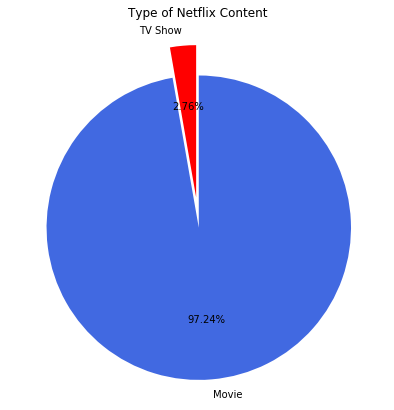

In [58]:
plt.figure(figsize=(10, 7))
labels = ['TV Show', 'Movie']
plt.pie(nf_type, labels = labels, explode=[0.1, 0.1],
       autopct='%1.2f%%',colors=['red','royalblue'], startangle=90)

plt.title('Type of Netflix Content')
plt.show()

In [59]:
# 어느 나라에서 제작된 작품이 많을까?

netflix['new_country'] = netflix['country'].apply(lambda x : x.split(",")[0])
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,rating_ages,genre,new_country
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,September 24,Adults(18+),Dramas,United States
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,September 24,Young Adults(16+),British TV Shows,United Kingdom
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,September 24,Teens(13+),Comedies,United States
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,September 23,Adults(18+),Dramas,Germany
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021,September 21,Young Adults(16+),Comedies,India


In [60]:
netflix['new_country'].value_counts().head(10)

United States     2130
India              910
United Kingdom     347
Canada             166
France             145
Spain              122
Egypt               95
Japan               91
Nigeria             89
Turkey              84
Name: new_country, dtype: int64

In [21]:
pip install plotly_express

Note: you may need to restart the kernel to use updated packages.


In [22]:
import plotly.express as px

In [49]:
nf_country_top10 = netflix['new_country'].value_counts().head(10)

In [50]:
fig = px.bar(nf_country_top10, y=nf_country_top10.index, x=nf_country_top10.values,
             orientation = "h", color = nf_country_top10.index,text = nf_country_top10.values,
            height = 500, width=1000)

#fig.update_traces( textfont_color = "white")
#fig.update_layout( title = 'Number of works by country of production', font_size=20 ,
                  # xaxis = dict ( title = "작품 수"), yaxis = dict ( title = "국가명"),
                   #showlegend  =False, template = 'plotly_white')

fig.show()

In [24]:
# 국가별 movie 등록 수 top10

nf_movies_top10 = netflix[netflix['type']=="Movie"]["new_country"].value_counts().head(10)
nf_movies_top10

United States     2099
India              902
UnKnown            333
United Kingdom     325
Canada             162
France             139
Spain              115
Egypt               95
Nigeria             85
Indonesia           82
Name: new_country, dtype: int64

In [25]:
fig = px.bar(nf_movies_top10, y=nf_movies_top10.index, x=nf_movies_top10.values,orientation = 'h', 
             color = nf_movies_top10.index, text = nf_movies_top10.values)

fig.show()


In [43]:
import plotly

In [44]:
# Movie 장르 수

nf_movie_genre = netflix[netflix['type']=='Movie']
nf_movie_genre['genre'].value_counts()

Dramas                      1585
Comedies                    1184
Action & Adventure           848
Children & Family Movies     548
Documentaries                397
Stand-Up Comedy              309
Horror Movies                274
International Movies         122
Classic Movies                73
Thrillers                     65
Movies                        27
Independent Movies            20
Anime Features                19
Music & Musicals              18
Sci-Fi & Fantasy              13
Cult Movies                   12
Romantic Movies                3
LGBTQ Movies                   1
Name: genre, dtype: int64

In [45]:
fig = px.bar(y = nf_movie_genre["genre"].value_counts().sort_values().index,
             x = nf_movie_genre["genre"].value_counts().sort_values().values,
             orientation = "h", color = nf_movie_genre["genre"].value_counts().index,
             text = nf_movie_genre["genre"].value_counts().sort_values().values)


plotly.offline.iplot(fig)